In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import fnmatch
import os
import random

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
dataset = "/Users/yoda/Documents/TFG/dataset"
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

In [4]:
restaurants = ["%s/%s" % (dataset, x) for x in os.listdir(dataset) if os.path.isdir("%s/%s" % (dataset, x))]

In [9]:
number_of_dishesh = 3
number_of_samples = 3
number_of_samples_reduced = len(colors)
ingredients = np.load(dataset + "/data/ingredients.npy")
recognition = np.load(dataset + "/data/recognition.npy")
family = np.load(dataset + "/data/family.npy")
#splitted = [(0, 1059, ingredients), (1059, 1259, recognition), (1250, 1270, family)]
splitted = [(0, 200, recognition), (200, 211, family)]

In [10]:
groups = list()
for i in range(number_of_dishesh):
    r = random.choice(restaurants)
    menus = ["%s/%s" % (r, x) for x in os.listdir(r) if os.path.isdir("%s/%s" % (r, x))]
    m = random.choice(menus)
    dishes = ["%s/%s" % (m, x) for x in os.listdir(m) if os.path.isdir("%s/%s" % (m, x))]
    d = random.choice(dishes)
    npys = ["%s/%s" % (d, x) for x in os.listdir(r"%s" % d) if x.endswith(".npy")]
    s_group = list()
    for npy in npys:
        s_group.append(np.load(npy))
    groups.append([d, s_group])

0.00017495382053311914
5.511882409336977e-05
0.0005418850341811776
0.0018482472514733672
0.001720016822218895
0.0012577456654980779
0.00026072928449139
0.0021225735545158386
5.712711572414264e-05
0.0031708942260593176
0.00010562693205429241
2.499466972949449e-05
9.307669097324833e-05
0.006308867130428553
5.1841605454683304e-05
0.00014731675037182868
0.001241956721059978
0.014866274781525135
0.07121243327856064
0.0008503806311637163
5.1211659410910215e-06
1.0432045201014262e-05
7.404143252642825e-05
0.00037677769432775676
0.03024623915553093
2.295763806614559e-06
0.005677475593984127
1.6303110896842554e-06
0.28691810369491577
0.0013113449094817042
0.0005968775949440897
5.723200501961401e-06
0.0020218731369823217
0.004467297811061144
0.00014979278785176575
0.0031974101439118385
0.0007318099378608167
0.07989566028118134
2.808551835187245e-05
0.0012018856359645724
0.1206105500459671
0.0005524879088625312
2.5561988877598196e-05
0.00012703731772489846
1.1250005627516657e-05
2.963032056868542

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

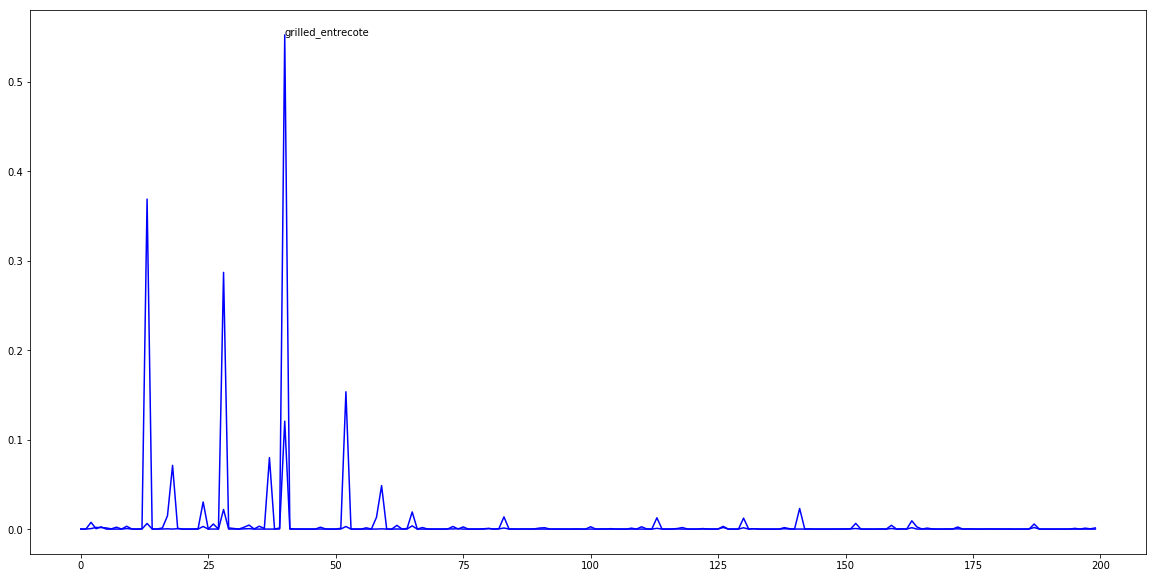

In [11]:
for s in splitted:
    plt.figure(figsize=(20,10))
    handles = list()
    for idx, g in enumerate(groups):
        for idx2, s_g in enumerate(random.sample(g[1], number_of_samples)):
            print(len())
            for x, el in enumerate(s_g[s[0]:s[1]]):
                if el > 0.5:
                    to_show = x
                    d1 = s[2].item()
                    for name in d1.keys():
                        if d1[name] == x:
                            to_show = name
                    plt.annotate(to_show, xy=(x,el))
            plt.plot(s_g[s[0]:s[1]], colors[idx])
        patch = mpatches.Patch(color=colors[idx], label=g[0].split("/")[-1].decode("utf-8").encode('ascii', 'ignore'))
        handles.append(patch)
    plt.legend(handles=handles)
    plt.show()

In [ ]:
for idx, g in enumerate(groups):
    for s in splitted:
        plt.figure(figsize=(20,10))
        for idx2, s_g in enumerate(random.sample(g[1], number_of_samples)):
            plt.plot(s_g[s[0]:s[1]], colors[idx])
            for x, el in enumerate(s_g[s[0]:s[1]]):
                if el > 0.5:
                    to_show = x
                    d1 = s[2].item()
                    for name in d1.keys():
                        if d1[name] == x:
                            to_show = name
                    plt.annotate(to_show, xy=(x,el))
        patch = mpatches.Patch(color=colors[idx], label=g[0].split("/")[-1].decode("utf-8").encode('ascii', 'ignore'))
        plt.legend(handles=[patch])
        plt.show()

In [ ]:
for idx, g in enumerate(groups):
    handles = list()
    plt.figure(figsize=(20,10))
    for idx2, s_g in enumerate(random.sample(g[1], number_of_samples)):
        plt.plot(s_g, colors[idx2])
        patch = mpatches.Patch(color=colors[idx2], label=str(idx2))
        handles.append(patch)
    plt.legend(handles=handles)
    plt.show()